In [1]:
!pip install astro-eddy==1.2.2

In [2]:
!pip install bettermoments==1.2.1

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [1]:
!pip install celerite

  Using cached celerite-0.4.0-cp38-cp38-win_amd64.whl (311 kB)


In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from eddy import rotationmap
np.random.seed(123)

In [9]:
hdul = fits.open('TWHya_CO_cube_v0.fits', memmap=True)

In [10]:
hdul.info()

Filename: TWHya_CO_cube_v0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   (2000, 2000)   float64   


In [11]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2000                                                  
NAXIS2  =                 2000                                                  
BMAJ    =    3.85393616226E-05                                                  
BMIN    =   3.638029512432E-05                                                  
BPA     =        -74.962059021                                                  
BUNIT   = 'm/s     '                                                            
CTYPE1  = 'RA---SIN'                                                            
CRVAL1  =         165.46590625                                                  
CDELT1  =  -2.777777777778E-06                                                  
CRPIX1  =               1001

In [6]:
data = hdul[0].data

In [12]:
data.shape

(2000, 2000)

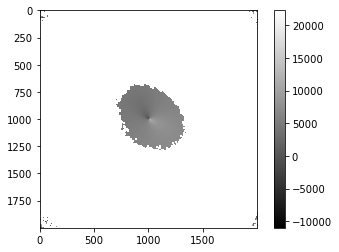

In [13]:
plt.figure()
plt.imshow(data, cmap='gray')
plt.colorbar()

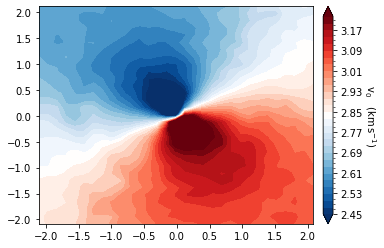

In [14]:
# Load Data from FITS file
cube = rotationmap(path='TWHya_CO_cube_v0.fits',
                   uncertainty='TWHya_CO_cube_dv0.fits',
                   downsample='beam',
                   clip=2.0)
# Plot Data
fig, ax = plt.subplots()
levels = np.nanpercentile(cube.data, [2, 98]) - cube.vlsr
levels = max(abs(levels[0]), abs(levels[1]))
levels = cube.vlsr + np.linspace(-levels, levels, 30)
im = ax.contourf(cube.xaxis, cube.yaxis, cube.data, levels,
                 cmap=rotationmap.colormap(), extend='both', zorder=-9)
cb = plt.colorbar(im, pad=0.03, format='%.2f')
cb.minorticks_on()
cb.set_label(r'${\rm v_{0} \quad (km\,s^{-1})}$',
             rotation=270, labelpad=15)